# Python OpenCV course playground

For familiarity and learning how to use computer vision

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

### Download the assets

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets...", end = "")

    # download the the zip file using the zipfile package
    urlretrieve(url, save_path)

    try:
        # extract the zip file using the zipfile package
        with ZipFile(save_path) as z:
            # Extract the zip file contents in the same directory
            z.extractall(os.path.split(save_path)[0])

        print("Done!")
    
    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if asset zip does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### Displaying images

In [5]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

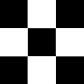

In [6]:
# Display a 84x84 pixel image
Image(filename = "checkerboard_84x84.jpg")

### Reading images using OpenCV

Flags:

1. `cv2.IMREAD_GRAYSCALE` or 0
2. `cv2.IMREAD_COLOR` or 1
3. `cv2.IMREAD_UNCHANGED` or -1 (including alpha channel)

In [7]:
# read image as gray scale
cb_img = cv2.imread("checkerboard_18x18.png", 0)

print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### Dislaying image attributes

In [9]:
# print image size
print("Image size (h x w) is:", cb_img.shape)

# print data type of image
print("Image data type is:", cb_img.dtype)

Image size (h x w) is: (18, 18)
Image data type is: uint8


### Displaying images using Matplotlib

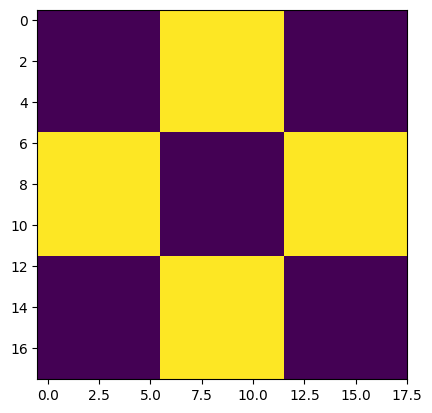

In [10]:
# display image
plt.imshow(cb_img)

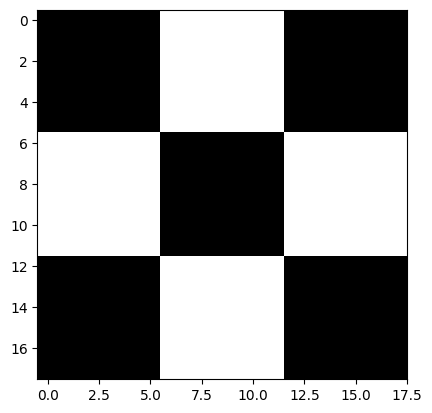

In [11]:
# display image with proper rendering
plt.imshow(cb_img, cmap = 'gray')

### Second example

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

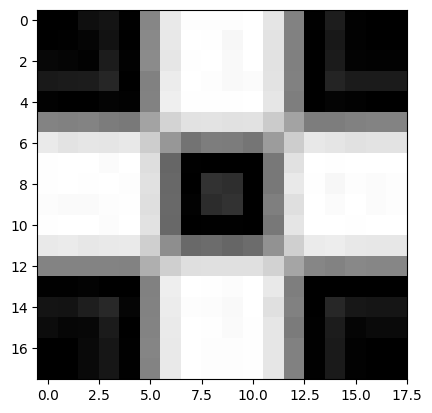

In [12]:
# read the fuzzy image
cb_img_fuzzy = cv2.imread('checkerboard_fuzzy_18x18.jpg', 0)

# print and display image
print(cb_img_fuzzy)
plt.imshow(cb_img_fuzzy, cmap="gray")

## Using color images

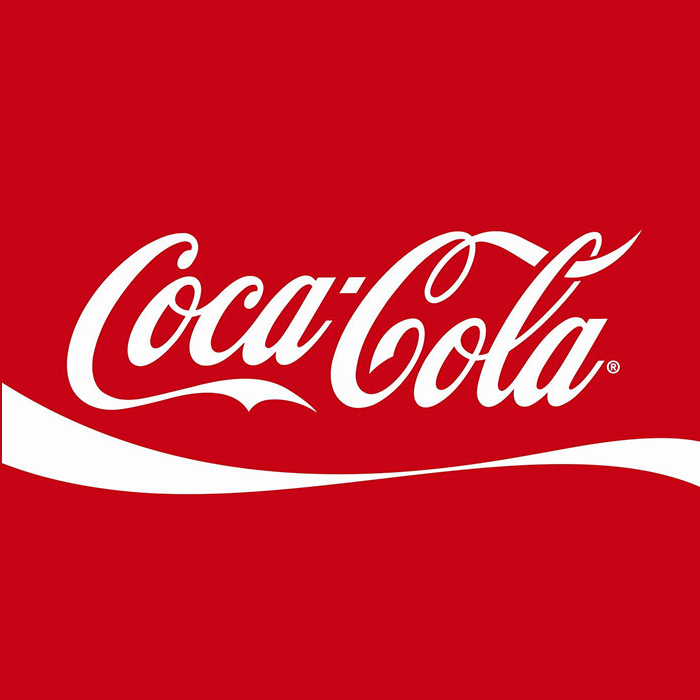

In [14]:
# show the logo image
Image("coca-cola-logo.png")

### Read and display color image

Check parameters

In [15]:
# read the image
coke_img = cv2.imread("coca-cola-logo.png", 1)

# print the image data
print("image size:", coke_img.shape)
print("image dtype:", coke_img.dtype)

image size: (700, 700, 3)
image dtype: uint8


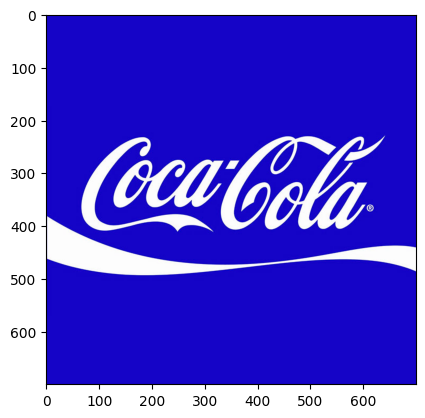

In [17]:
plt.imshow(coke_img)
# What happened ???

OpenCV stores values in GBR order rather the RGB, thus we need to reverse the image color channel data

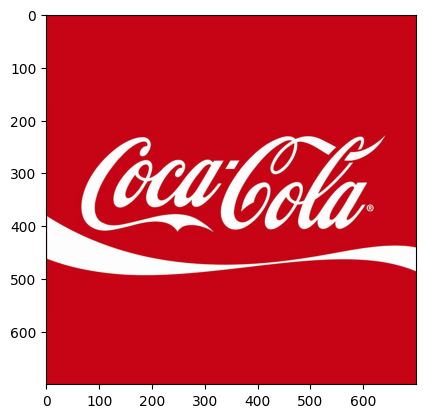

In [18]:
# coke img rev
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Splitting and merging color channels

Text(0.5, 1.0, 'Merge output')

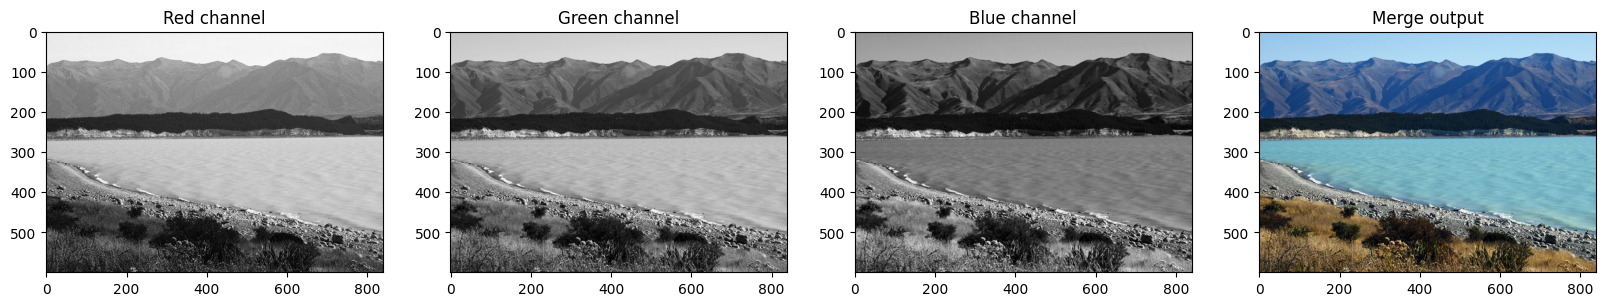

In [22]:
# split the image into B, G, R components
img_nz_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
r, g, b = cv2.split(img_nz_bgr)

# show the bgr channels
plt.figure(figsize = [20, 5])

plt.subplot(141); plt.imshow(r, cmap = "gray"); plt.title("Red channel")
plt.subplot(142); plt.imshow(g, cmap = "gray"); plt.title("Green channel")
plt.subplot(143); plt.imshow(b, cmap = "gray"); plt.title("Blue channel")

# Merge the individual channel into a BGR image
imgMerged = cv2.merge((b,g,r))

# merged image
plt.subplot(144)
plt.imshow(imgMerged)
plt.title("Merge output")

### Converting to different color spaces

Changing from BGR to RGB

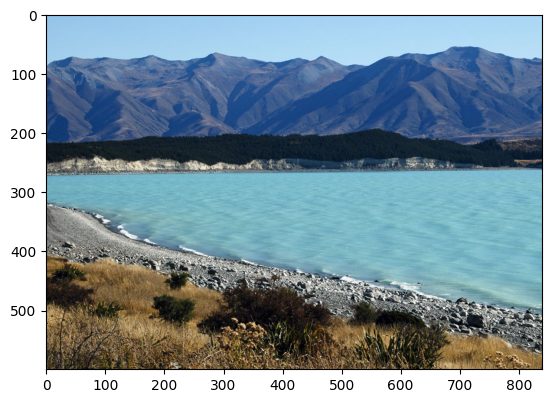

In [25]:
# changing from BGR to RGB
img_nz_rgb = cv2.cvtColor(img_nz_bgr, cv2.COLOR_RGB2BGR)
plt.imshow(img_nz_rgb)

# Changing to HSV color space

Text(0.5, 1.0, 'Original')

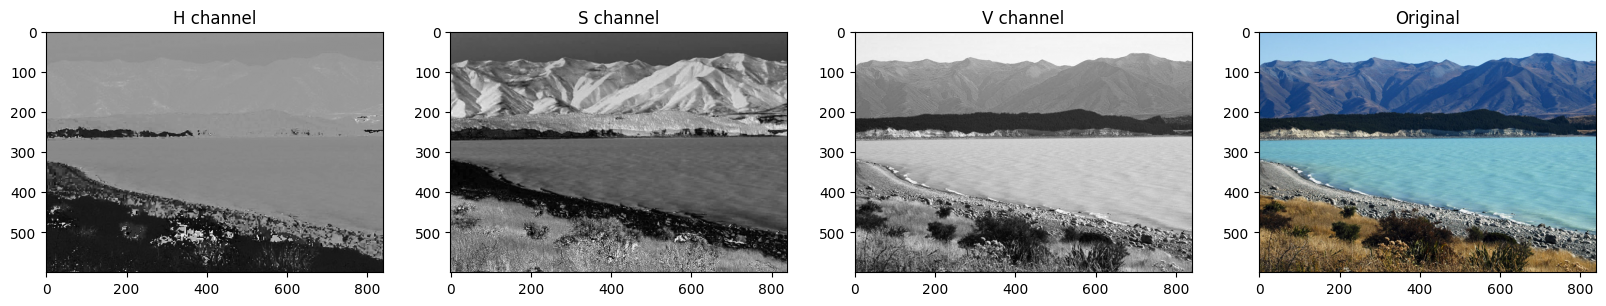

In [26]:
img_hsv = cv2.cvtColor(img_nz_bgr, cv2.COLOR_BGR2HSV)

# split into hue, saturation and value components
h, s, v = cv2.split(img_hsv)

# show the channels
plt.figure(figsize = [20,5])
plt.subplot(141); plt.imshow(h, cmap = "gray"); plt.title("H channel")
plt.subplot(142); plt.imshow(s, cmap = "gray"); plt.title("S channel")
plt.subplot(143); plt.imshow(v, cmap = "gray"); plt.title("V channel")
plt.subplot(144); plt.imshow(img_nz_rgb); plt.title("Original")


### Modifying individual channels

Text(0.5, 1.0, 'Original')

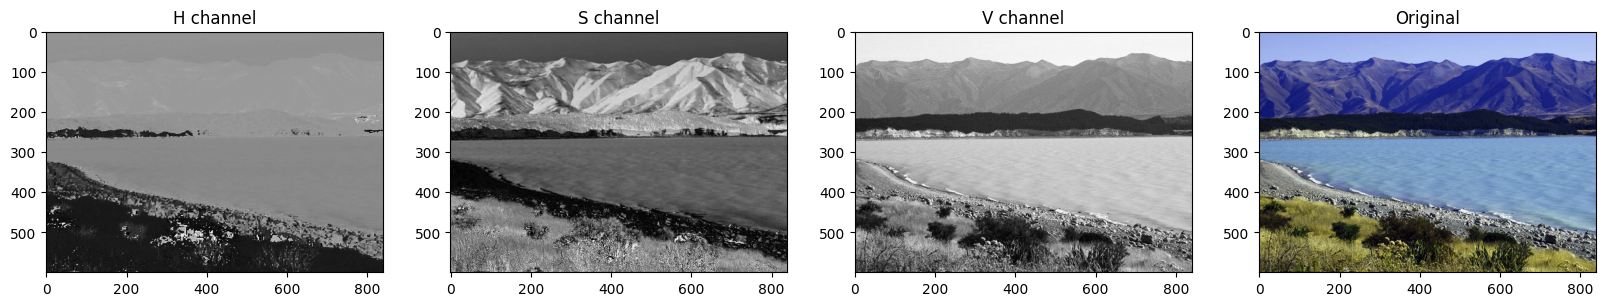

In [29]:
h_new = h + 10
img_nz_merged = cv2.merge((h_new, s, v))
img_nz_rgb = cv2.cvtColor(img_nz_merged, cv2.COLOR_HSV2RGB)

# Show each channel
plt.figure(figsize = [20, 5])

plt.subplot(141); plt.imshow(h, cmap = "gray"); plt.title("H channel")
plt.subplot(142); plt.imshow(s, cmap = "gray"); plt.title("S channel")
plt.subplot(143); plt.imshow(v, cmap = "gray"); plt.title("V channel")
plt.subplot(144); plt.imshow(img_nz_rgb); plt.title("Original")

## Saving images

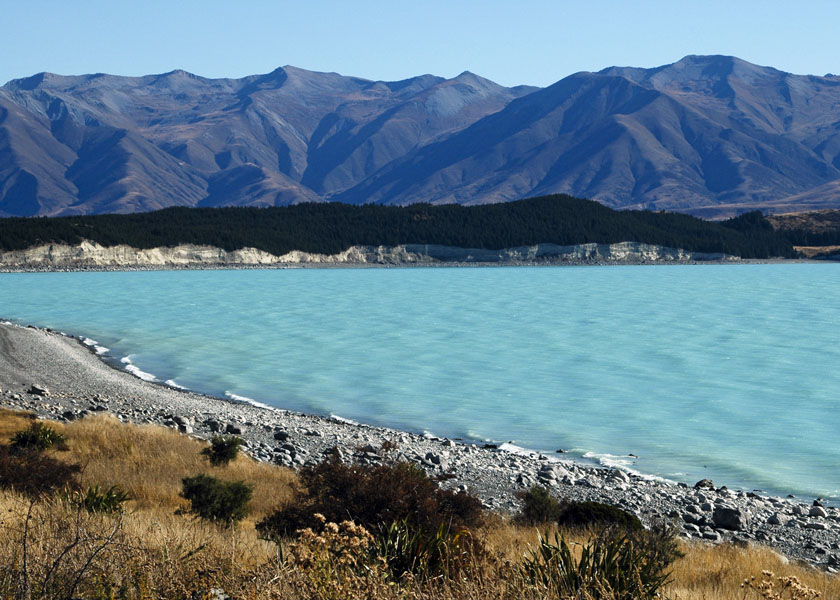

In [30]:
# save the image
cv2.imwrite("New Zealand Saved.png", img_nz_bgr)

Image(filename = "New_Zealand_Lake.jpg")

In [32]:
# read image as Color
img_nz_bgr = cv2.imread("New Zealand Saved.png", cv2.IMREAD_COLOR)
print("img_nz_bgr shape (H, W, C) is:", img_nz_bgr.shape)

# read the image as grayscaled
img_nz_gry = cv2.imread("New Zealand Saved.png", cv2.IMREAD_GRAYSCALE)
print("img_nz_gry shape (H, W) is:", img_nz_gry.shape)

img_nz_bgr shape (H, W, C) is: (600, 840, 3)
img_nz_gry shape (H, W) is: (600, 840)
